# Real Estate Investment Time Series Analysis

## Exploratory Data Analysis

In [2]:
##Import the tools to use for EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from warnings import catch_warnings
from warnings import filterwarnings

In [3]:
## read in the data, which has been pickled and saved
errors_df = pd.read_pickle('../data/processed/errors_df.pkl')
zipcodes = pd.read_pickle('../data/processed/zipcodes.pkl')

In [4]:
## preview the data
zipcodes

,94601,48240,94590,33705,37210,15201,33460,33030,37207,11216,...,48239,33068,32205,80219,30238,33982,33805,49507,89104,33409
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,114600.0,67800.0,108200.0,54600.0,60800.0,34400.0,59800.0,76700.0,63600.0,146100.0,...,80100.0,82000.0,54700.0,83700.0,85300.0,64100.0,41900.0,49700.0,94800.0,77300.0
1996-05-01,114500.0,68200.0,107800.0,54800.0,61000.0,34600.0,59900.0,76600.0,63600.0,146600.0,...,80700.0,81900.0,54600.0,84000.0,85300.0,63700.0,41900.0,51000.0,94700.0,77200.0
1996-06-01,114500.0,68500.0,107500.0,55000.0,61200.0,34700.0,60000.0,76500.0,63600.0,147200.0,...,81300.0,81800.0,54400.0,84300.0,85300.0,63300.0,42000.0,52300.0,94700.0,77200.0
1996-07-01,114400.0,68800.0,107300.0,55200.0,61300.0,34700.0,60200.0,76400.0,63700.0,147700.0,...,81900.0,81700.0,54300.0,84700.0,85300.0,62900.0,42100.0,53500.0,94700.0,77100.0
1996-08-01,114400.0,69200.0,107100.0,55400.0,61500.0,34800.0,60400.0,76300.0,64000.0,148400.0,...,82500.0,81600.0,54200.0,85100.0,85200.0,62500.0,42200.0,54600.0,94800.0,77100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,535800.0,71000.0,357100.0,167100.0,217200.0,170400.0,206000.0,209200.0,189500.0,1545700.0,...,90800.0,209200.0,141100.0,298100.0,95400.0,187800.0,97000.0,106600.0,196300.0,190000.0
2018-01-01,546900.0,72300.0,362500.0,168200.0,219300.0,171400.0,209600.0,211100.0,191400.0,1540200.0,...,91900.0,211000.0,144100.0,302600.0,97200.0,192500.0,99000.0,107800.0,199500.0,192500.0
2018-02-01,555000.0,73500.0,366900.0,171100.0,221500.0,173900.0,211600.0,212700.0,193900.0,1553600.0,...,93600.0,213700.0,146100.0,306900.0,99100.0,196400.0,100400.0,108900.0,202500.0,193700.0


In [5]:
## extract the 1st 20 columns to view
columns_20 = zipcodes.columns[0:20]

In [6]:
## view the top 20 columns
columns_20

Index(['94601', '48240', '94590', '33705', '37210', '15201', '33460', '33030',
       '37207', '11216', '33461', '33415', '32807', '34234', '34207', '34982',
       '33055', '33801', '30316', '33135'],
      dtype='object')

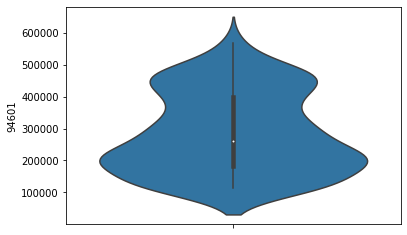

In [7]:
## use violinplot to gauge distribution
sns.violinplot(y=zipcodes[columns_20[0]])

In [8]:
##pivot data for further previews
melted_zips = zipcodes.melt(var_name='zipcode', value_name='price')

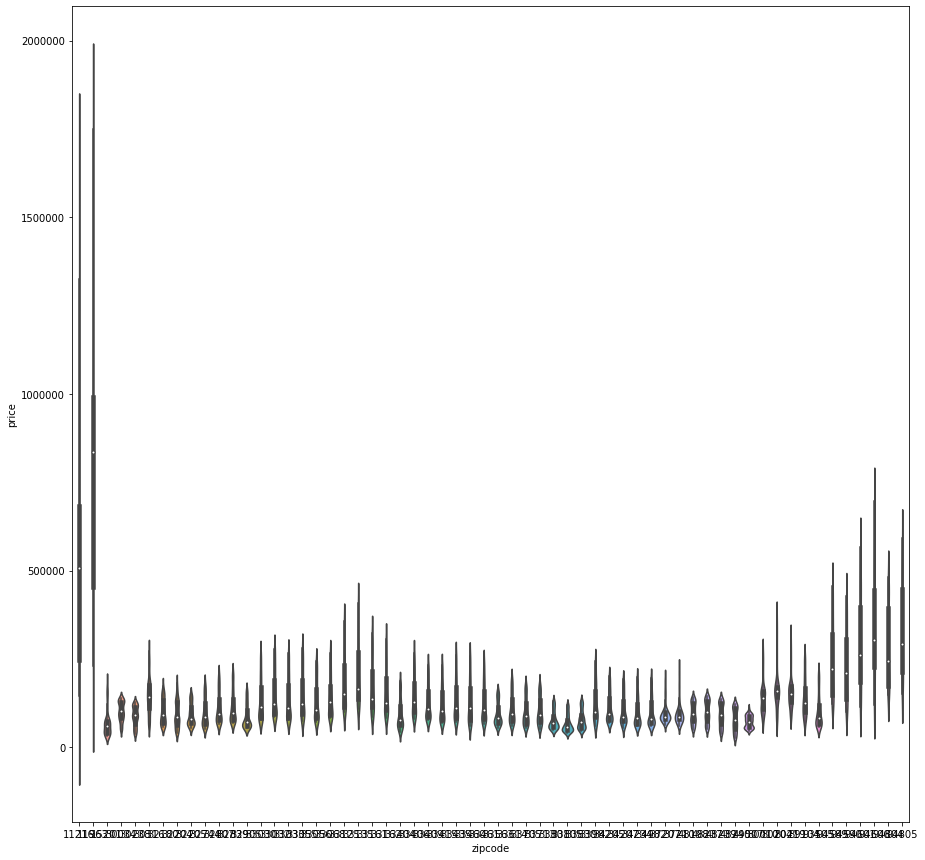

In [9]:
## create violin plot to view distributions by zipcode
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='price', data=melted_zips)

In [10]:
##preview errors dataframe
errors_df.replace(to_replace=np.inf, value=800, inplace=True)

In [11]:
errors_df

,94601,48240,94590,33705,37210,15201,33460,33030,37207,11216,...,48239,33068,32205,80219,30238,33982,33805,49507,89104,33409
time,,,,,,,,,,,,,,,,,,,,,
2005-03-01,0.198816,1.160469,0.050062,0.204700,0.556428,0.153183,0.287780,0.244003,0.977744,0.211050,...,1.234784,0.674110,0.189255,0.959610,0.448001,0.244193,0.307724,0.194984,0.253500,0.298641
2005-04-01,0.185480,1.292595,0.048766,0.214983,0.542404,0.293860,0.288321,0.259267,0.998884,0.220657,...,1.789909,0.659905,0.205836,1.001248,0.460966,0.272226,0.295506,0.084532,0.258988,0.307420
2005-05-01,0.198448,1.199488,0.048701,0.220525,0.407560,0.201076,0.305051,0.286829,0.651325,0.250153,...,1.321828,0.626524,0.231907,0.944602,0.598628,0.302943,0.337566,0.057431,0.273154,0.301942
2005-06-01,0.171409,1.433556,0.051104,0.233000,0.447464,0.119558,0.298325,0.312967,0.246528,0.265583,...,1.336989,0.512978,0.250582,1.080831,0.595122,0.343414,0.306990,0.041882,0.283620,0.311968
2005-07-01,0.160038,1.160690,0.062843,0.260013,0.363420,0.164845,0.301967,0.313014,0.385373,0.294438,...,1.209495,0.515437,0.285672,0.990552,0.594586,0.378390,0.307597,0.024487,0.307264,0.297271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,0.557372,0.268516,0.030723,0.141683,0.192585,0.321179,0.165638,0.146247,0.860533,0.536752,...,0.322795,0.083129,0.362242,0.388269,0.546484,0.550694,0.584457,0.441412,0.715321,0.125243
2018-01-01,0.030639,0.080963,0.053505,0.312947,0.279975,0.452367,0.045370,0.042966,0.286543,0.302284,...,0.348747,0.074482,0.437613,0.407071,0.256024,0.293913,0.212655,0.188860,0.191578,0.204450
2018-02-01,0.142304,0.367338,0.126595,0.113641,0.409999,0.498664,0.341642,0.705278,0.337116,0.115289,...,0.302995,0.083253,0.236339,0.402065,0.397682,0.457009,0.506844,0.117428,0.118441,0.350733


In [12]:
## pivot errors dataframe
melted_errors = errors_df.melt(var_name='zipcode', value_name='error_pct')

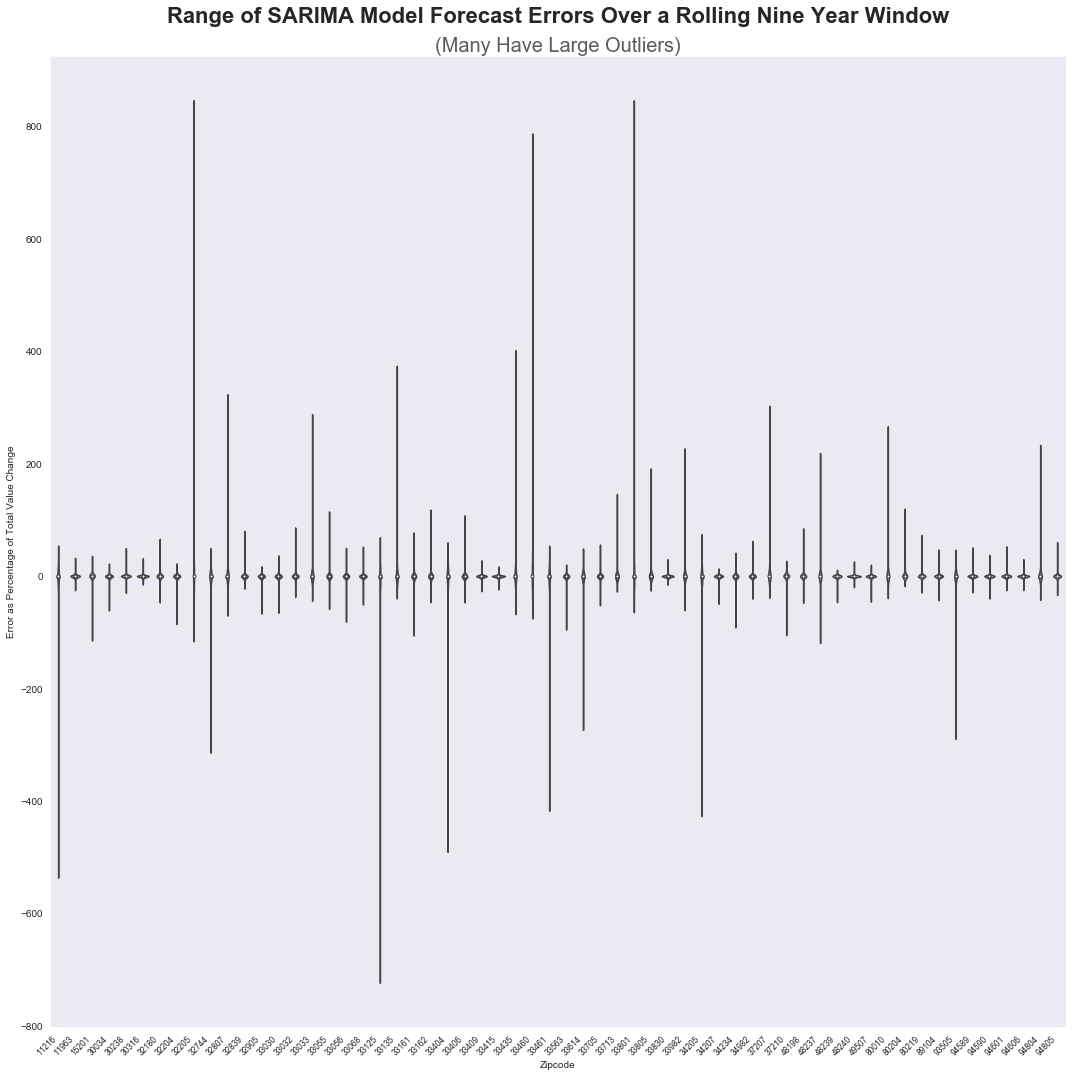

In [13]:
## Import matplotlib consistent style
from matplotlib import style

# style.use('fivethirtyeight')
sns.set_style('dark')
fig, ax = plt.subplots(figsize=(15,15))

## Plot SARIMA Model forecsast error data to visualize (outliers)
ax = sns.violinplot(x='zipcode', y='error_pct', data=melted_errors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='small')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Error as Percentage of Total Value Change')
# ax.set_title('Forecast Errors of SARIMA Models Over a Rolling Nine Year Window')
ax.text(x=0.5, y=1.03, s='Range of SARIMA Model Forecast Errors Over a Rolling Nine Year Window', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.0, s='(Many Have Large Outliers)', fontsize=20, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
fig.tight_layout()
fig.savefig('../figures/big_error_pct.png')
plt.show();

In [14]:
# Narrow down zipcodes to model based off of historical range of errors
error_ranges = errors_df.max() - errors_df.min()
ten_smallest_error_ranges = error_ranges.sort_values().head(10)

In [1]:
## Based on desire to increase ROI while accounting for risk,
## use ten smallest error ranges. Preview and sort
ten_smallest_error_ranges

NameError: name 'ten_smallest_error_ranges' is not defined

In [16]:
target_zips = zipcodes[ten_smallest_error_ranges.index]

In [17]:
target_zips.median().sort_values()

33830     72000.0
49507     72800.0
48240     76700.0
34207     86700.0
48239     91400.0
33415    103800.0
33409    108400.0
30316    142100.0
94606    303600.0
11963    835000.0
dtype: float64

In [18]:
## separate into two main groups of investment points,
## based on visual observation

high_medians = target_zips[target_zips.median().sort_values().index[-2:]]
low_medians = target_zips[target_zips.median().sort_values().index[0:-2]]

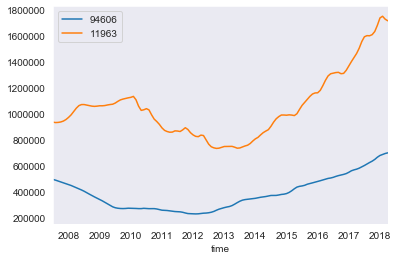

In [20]:
high_medians[-130:].plot()

In [21]:
melted_high_medians = high_medians.melt(var_name='zipcode', value_name='price')
melted_low_medians = low_medians.melt(var_name='zipcode', value_name='price')

In [22]:
low_medians

,33830,49507,48240,34207,48239,33415,33409,30316
time,,,,,,,,
1996-04-01,45200.0,49700.0,67800.0,67600.0,80100.0,70000.0,77300.0,62300.0
1996-05-01,45700.0,51000.0,68200.0,67800.0,80700.0,70100.0,77200.0,62300.0
1996-06-01,46200.0,52300.0,68500.0,68000.0,81300.0,70300.0,77200.0,62300.0
1996-07-01,46600.0,53500.0,68800.0,68200.0,81900.0,70400.0,77100.0,62300.0
1996-08-01,46900.0,54600.0,69200.0,68400.0,82500.0,70600.0,77100.0,62300.0
...,...,...,...,...,...,...,...,...
2017-12-01,126400.0,106600.0,71000.0,159900.0,90800.0,184100.0,190000.0,258800.0
2018-01-01,127700.0,107800.0,72300.0,160900.0,91900.0,186400.0,192500.0,261600.0
2018-02-01,129200.0,108900.0,73500.0,162300.0,93600.0,188600.0,193700.0,264300.0


In [23]:
melted_target_zips = target_zips.melt(var_name='zipcode', value_name='price')

In [24]:
melted_target_zips = target_zips[-108:].melt(var_name='zipcode', value_name='price')

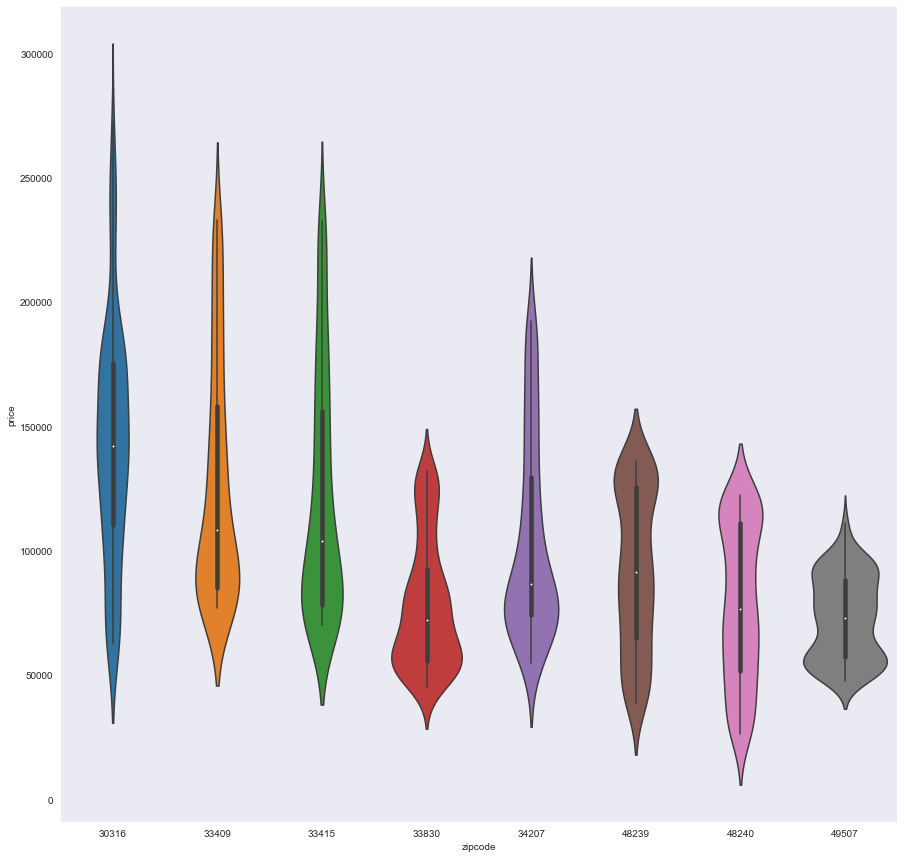

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='price', data=melted_low_medians)
# re.sub(r'000$', r',000', str(x))
# [x for x in ax.get_yticklabels()]
y_labels = ax.get_yticklabels()
# ax.set_yticklabels()
# [x.text for x in y_labels]
fig.savefig('../figures/draft_violinplot.png')

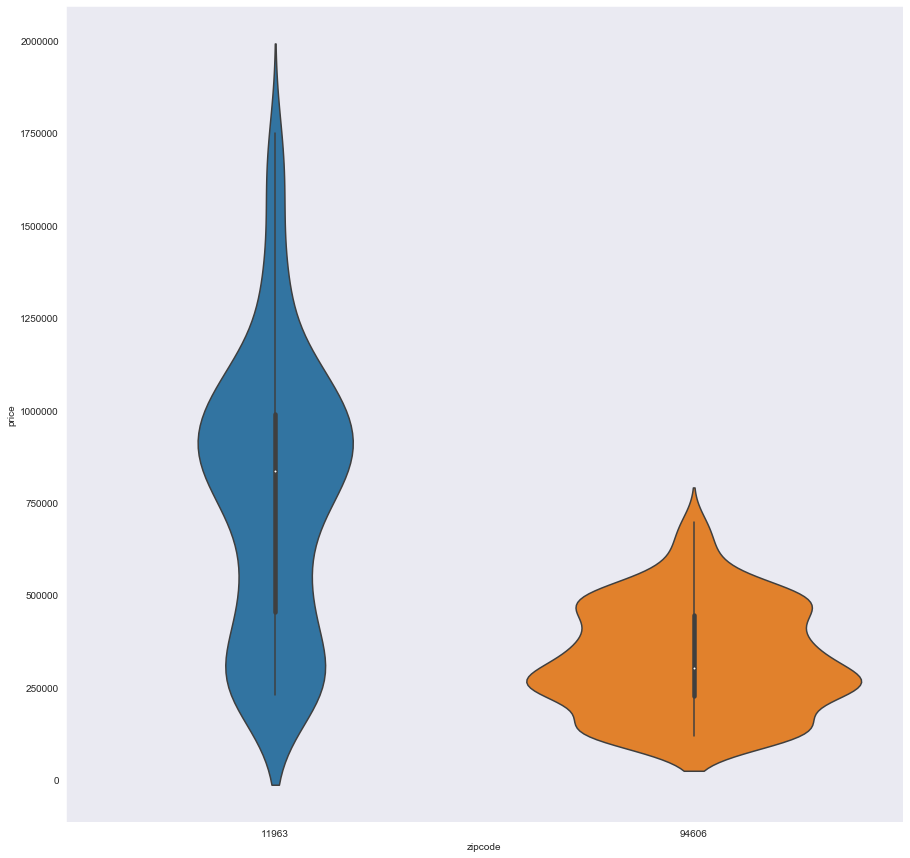

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.violinplot(x='zipcode', y='price', data=melted_high_medians)
# re.sub(r'000$', r',000', str(x))
# [x for x in ax.get_yticklabels()]
y_labels = ax.get_yticklabels()
# ax.set_yticklabels()
# [x.text for x in y_labels]
fig.savefig('../figures/draft_high_median_violinplot.png')

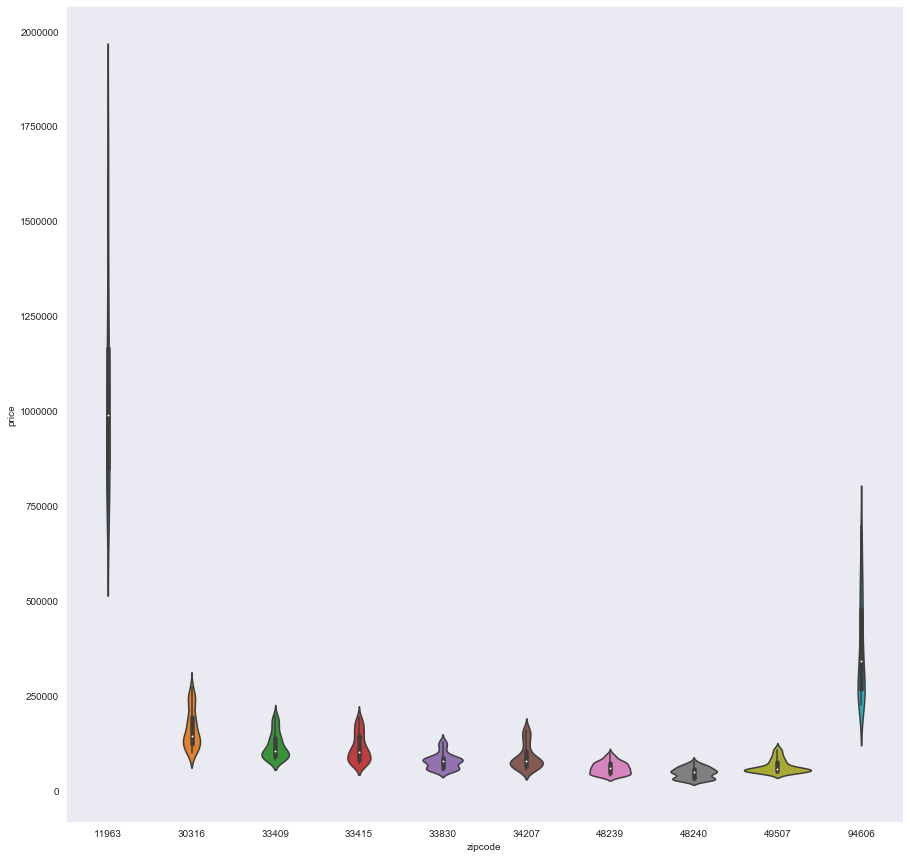

In [27]:


fig, ax = plt.subplots(figsize=(15,15))
sns.violinplot(x='zipcode', y='price', data=melted_target_zips)

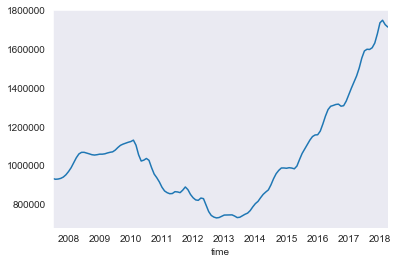

In [28]:
zipcodes['11963'][-130:].plot()

In [29]:
target_zips[-108:]

,33415,33830,30316,48240,33409,94606,48239,11963,34207,49507
time,,,,,,,,,,
2009-05-01,118500.0,88100.0,143900.0,61300.0,124000.0,291800.0,71100.0,1069200.0,86000.0,63700.0
2009-06-01,113900.0,85400.0,141700.0,58200.0,118700.0,280900.0,68200.0,1071600.0,82300.0,61600.0
2009-07-01,110400.0,83300.0,140200.0,55600.0,114400.0,273700.0,65800.0,1080500.0,79900.0,59400.0
2009-08-01,107900.0,81700.0,139600.0,53500.0,111200.0,269800.0,63800.0,1093700.0,78600.0,57500.0
2009-09-01,105900.0,80400.0,139900.0,51700.0,108600.0,267800.0,61900.0,1105000.0,77800.0,56400.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,184100.0,126400.0,258800.0,71000.0,190000.0,663100.0,90800.0,1679800.0,159900.0,106600.0
2018-01-01,186400.0,127700.0,261600.0,72300.0,192500.0,676500.0,91900.0,1736600.0,160900.0,107800.0
2018-02-01,188600.0,129200.0,264300.0,73500.0,193700.0,683700.0,93600.0,1749800.0,162300.0,108900.0


In [30]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX


def RMSE(y_true, y_pred, last_only=True):
    """Simple wrapper function on mean_squared_error to return RMSE
    
    Params:
        predictions (series or array like object), the predicted values from model
        test_data (series or array like object), the true target values
        
    Returns:
        RMSE (list) list of accumulated RMSE values for each observation in consecutive time order
        i.e. the first return value will be just the error of first prediction, second the sqrt of mean squared error for first 2 predictions, etc."""

    
    # Ensure predictions and test_data are same size
    if len(y_pred) != len(y_true):
        return "Test data and predictions must have equal length"
    
    elif last_only == False:
        rmse = [mean_squared_error(y_true[:i+1], y_pred[:i+1], squared=False) for i, _ in enumerate(y_pred)]
        return rmse
    else:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        return rmse

def error_as_pct(rmse, start_val, end_val):
    """Compute the error (rmse) as a percentage of the total change in value
    
    Params: rmse(float) the residual mean squared error of a forecast, start_val(float) the starting value in from the month before 
        forecasting begins, end_val(float) the last value of the forecast
        
    Returns:
        (float) rmse as a percentage of total change between start and end of forecast"""
    
    total_delta = end_val - start_val
    error_pct = rmse / total_delta
    return error_pct

def SARIMAX_error(series, p=0, d=2, q=1, P=1, D=1, Q=0, s=2):
    """Simple wrapper that fits SARIMAX model and returns RMSE (raw and pct) for the predictions, confidence interval, start of forecast and end of actual 
    values"""
    
    
    X = series
    
    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]

    model = SARIMAX(train, freq='MS', order=(p,d,q), seasonal_order=(P,D,Q,s), initialization='approximate_diffuse')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.get_forecast(steps=48)
    pred_ci = forecast.conf_int(alpha=.05)

    predictions = forecast.predicted_mean

    rmse = RMSE(test, predictions)
    pct = error_as_pct(rmse, train[-1], test[-1])
    
    return {'pred_ci': pred_ci, 'rmse': rmse, 'pct_error': pct, 'test': test, 'predictions': predictions, 'series': X}

In [31]:
sarimax_dict = {column: SARIMAX_error(target_zips[column]) for column in low_medians}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/

In [32]:
{zipcode: sarimax_dict[zipcode]['pct_error'] for zipcode in sarimax_dict.keys()}

{'33830': 623.5663775635196,
 '49507': 0.3947963511086853,
 '48240': 130.34369089495604,
 '34207': 1.3136855677332475,
 '48239': 736.350746994268,
 '33415': 2.7665762635014963,
 '33409': 0.5230871442533933,
 '30316': 1.3489975541266033}

In [33]:
high_dict = {column: SARIMAX_error(target_zips[column]) for column in high_medians}
{zipcode: high_dict[zipcode]['rmse'] for zipcode in high_dict.keys()}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'94606': 9197.09186566687, '11963': 385328.17845933273}

In [92]:
## Create lists of parameter values through which to iterate

p_list = [*range(0,10)]
d_list = [*range(0,3)]
q_list = [*range(0,3)]
P_list = [*range(0,3)]
D_list = [*range(0,2)]
Q_list = [*range(0,3)]
s_list = [*range(0,6)]

##Create function to iterate through configurations for SARIMA model

def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

cfgs = sarima_configs()


# REWRITTEN ON THE FLY TO SUPPORT QUICKER RETURN VALS FOR MODEL EVAL
def SARIMAX_error(series, cfg):
    """Simple wrapper that fits SARIMAX model and returns RMSE (raw and pct) for the predictions, confidence interval, start of forecast and end of actual 
    values"""
    
    
    X = series
    
    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]

    model = SARIMAX(train, freq='MS', order=cfg[0], seasonal_order=cfg[1], trend=cfg[2], initialization='approximate_diffuse')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.get_forecast(steps=48)
    pred_ci = forecast.conf_int(alpha=.05)

    predictions = forecast.predicted_mean

    rmse = RMSE(test, predictions)
    pct = error_as_pct(rmse, train[-1], test[-1])
    
    #return {'pred_ci': pred_ci, 'rmse': rmse, 'pct_error': pct, 'test': test, 'predictions': predictions, 'series': X}
    return pct


def SARIMAX_ROI(series, cfg):
    """Simple wrapper that fits SARIMAX model and returns RMSE (raw and pct) for the predictions, confidence interval, start of forecast and end of actual 
    values"""
    
    
    X = series
    
    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]

    model = SARIMAX(train, freq='MS', order=cfg[0], seasonal_order=cfg[1], trend=cfg[2], initialization='approximate_diffuse')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.get_forecast(steps=48)
    pred_ci = forecast.conf_int(alpha=.05)

    predictions = forecast.predicted_mean

    rmse = RMSE(test, predictions)
    pct = error_as_pct(rmse, train[-1], test[-1])
    
    ROI = (predictions[-1] - train[-1]) / train[-1]
    
    #return {'pred_ci': pred_ci, 'rmse': rmse, 'pct_error': pct, 'test': test, 'predictions': predictions, 'series': X}
    return ROI

def SARIMAX_predictions(series, cfg):
    """Simple wrapper that fits SARIMAX model and returns RMSE (raw and pct) for the predictions, confidence interval, start of forecast and end of actual 
    values"""
    
    
    X = series
    
    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]

    model = SARIMAX(train, freq='MS', order=cfg[0], seasonal_order=cfg[1], trend=cfg[2], initialization='approximate_diffuse')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.get_forecast(steps=48)
    pred_ci = forecast.conf_int(alpha=.05)

    predictions = forecast.predicted_mean

    rmse = RMSE(test, predictions)
    pct = error_as_pct(rmse, train[-1], test[-1])
    
    ROI = (predictions[-1] - train[-1]) / train[-1]
    
    #return {'pred_ci': pred_ci, 'rmse': rmse, 'pct_error': pct, 'test': test, 'predictions': predictions, 'series': X}
    return predictions



def score_model(data, cfg):
    result = None
    # convert config to a key
    key = str(cfg)
    # one failure during model validation suggests an unstable config
    try:
        # never show warnings when grid searching, too noisy
        with catch_warnings():
            filterwarnings("ignore")
            result = SARIMAX_error(data, cfg)
    # set error 
    except:
        error = None
    # check for an interesting result
    if result is None:
        result = 10000
    # set None results to a very high number to allow for quick sorting of the result list (we only really want the small values)
#     else:
#         result = 10000
    return (cfg, result)


# [SARIMAX_error(target_zips['33830'], p=p_n, s=3)['pct_error'] if p_n == 2 else SARIMAX_error(target_zips['33830'], p=p_n)['pct_error'] for p_n in p_list]

def best_model(data, cfgs):
    result = [score_model(data, cfg) for cfg in cfgs]
    res = sorted(result, key=lambda x: x[1])
    return res[0]


    


In [42]:
test_scores = best_model(target_zips['33830'], cfgs)
# test_scores.sort(key=lambda x: x[1])[0]
# sorted(test_scores, key=lambda x: x[1])
test_scores

([(0, 1, 2), (0, 0, 0, 0), 'ct'], 0.08069576425546653)

In [36]:
score_model(target_zips['33830'], cfg)

NameError: name 'cfg' is not defined

In [46]:
from functools import partial

best_models = [(column, best_model(low_medians[column], cfgs)) for column in low_medians.columns]
# for column in low_medians.columns:
#     best_models.append((column, best_model(column, cfgs)))

In [50]:
best_models[0][0]

'33830'

In [58]:
best_models

[('33830', ([(0, 1, 2), (0, 0, 0, 0), 'ct'], 0.08069576425546653)),
 ('49507', ([(0, 1, 2), (0, 0, 0, 0), 'ct'], 0.03373389268645687)),
 ('48240', ([(2, 1, 1), (0, 0, 0, 0), 'ct'], 0.06105429071571234)),
 ('34207', ([(1, 0, 0), (0, 0, 0, 0), 'ct'], 0.06435950580487994)),
 ('48239', ([(2, 1, 1), (0, 0, 0, 0), 'ct'], 0.05129206183279851)),
 ('33415', ([(2, 0, 0), (0, 0, 0, 0), 'ct'], 0.07660754984216842)),
 ('33409', ([(1, 0, 2), (0, 0, 0, 0), 't'], 0.034227145034570534)),
 ('30316', ([(2, 1, 2), (0, 0, 0, 0), 't'], 0.047568141577886476))]

In [54]:
print(best_models[0][0], best_models[0][1])

33830 ([(0, 1, 2), (0, 0, 0, 0), 'ct'], 0.08069576425546653)


In [56]:
lmedian_roi_dict = {model_zip[0]: SARIMAX_ROI(low_medians[model_zip[0]],model_zip[1][0]) for model_zip in best_models} 


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS wil

NameError: name 'l_median_roi_dict' is not defined

In [57]:
lmedian_sorted = {k: v for k, v in sorted(lmedian_roi_dict.items(), key=lambda item: item[1], reverse=True)}
lmedian_sorted

{'34207': 1.0878498404635966,
 '33415': 1.0840771815135395,
 '33830': 1.0040166898310032,
 '49507': 1.003441714144584,
 '33409': 0.8744137102143154,
 '48240': 0.8445206764961235,
 '30316': 0.7922934412058605,
 '48239': 0.7054356269332223}

In [64]:
import pickle

# pickle.dump(lmedian_sorted, open('../models/lmedian_sorted.pkl', 'wb'))

# pickle.dump(best_models, open('../models/best_models.pkl', 'wb'))
# pickle.dump(sarimax_dict, open('../models/sarimax_dict.pkl', 'wb'))
# sarimax_dict

pickle.dump(best_models, open('../models/best_models_high_medians.pkl', 'wb'))
pickle.dump(best_models, open('../models/hmedian_roi_dict.pkl', 'wb'))


In [279]:
sarimax_dict.keys()

dict_keys(['33830', '49507', '48240', '34207', '48239', '33415', '33409', '30316'])

In [62]:
# Return best model fits for high median zipcode set
best_models_high_medians = [(column, best_model(high_medians[column], cfgs)) for column in high_medians.columns]
best_models_high_medians

[('94606', ([(2, 1, 0), (0, 0, 0, 0), 'ct'], 0.0301606701243062)),
 ('11963', ([(2, 0, 1), (0, 0, 0, 0), 'ct'], 0.09501346754203241))]

In [63]:
# Return predicted ROI with best tuned model fit for high median set
hmedian_roi_dict = {model_zip[0]: SARIMAX_ROI(high_medians[model_zip[0]],model_zip[1][0]) for model_zip in best_models_high_medians} 
hmedian_roi_dict

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'94606': 0.9174595810596209, '11963': 1.2970590104148543}

In [75]:
## Create dictionary for best models
best_models_dict = {k: v for (k,v) in best_models}
best_models_dict['33830'][1]

0.08069576425546653

In [143]:
# Loop through best models for high medians
best_models_high_medians_dict = {k: v for (k,v) in best_models_high_medians}
best_models_high_medians_dict

{'94606': ([(2, 1, 0), (0, 0, 0, 0), 'ct'], 0.0301606701243062),
 '11963': ([(2, 0, 1), (0, 0, 0, 0), 'ct'], 0.09501346754203241)}

In [ ]:
best_models

In [175]:
lmedian_sorted_error = {k: [v, best_models_dict[k][1]] for k, v in lmedian_sorted.items()}
lmed_df = pd.DataFrame(lmedian_sorted_error).transpose()

In [176]:
lmed_df['ROI'] = lmed_df[0].map(lambda x: x * 100)

In [177]:
lmed_df['ROI'] = lmed_df.ROI.map(lambda x: f'{round(x, 2)}%')
lmed_df['RMSE as Percentage of Total Change'] = lmed_df[1].map(lambda x: f'{round(x*100, 2)}%')
lmed_df.drop([0,1], axis=1, inplace=True)
lmed_df

,ROI,RMSE as Percentage of Total Change
34207,108.78%,6.44%
33415,108.41%,7.66%
33830,100.4%,8.07%
49507,100.34%,3.37%
33409,87.44%,3.42%
48240,84.45%,6.11%
30316,79.23%,4.76%
48239,70.54%,5.13%


In [ ]:
lmedian_sorted_error = {k: [v, best_models_dict[k][1]] for k, v in lmedian_sorted.items()}
lmed_df = pd.DataFrame(lmedian_sorted_error).transpose()

In [178]:
hmedian_roi_dict

{'94606': 0.9174595810596209, '11963': 1.2970590104148543}

In [180]:
hmedian_dict = {k: [hmedian_roi_dict[k], best_models_high_medians_dict[k][1]] for k in hmedian_roi_dict.keys()}

In [181]:
hmedian_dict

{'94606': [0.9174595810596209, 0.0301606701243062],
 '11963': [1.2970590104148543, 0.09501346754203241]}

In [182]:

hmed_df = pd.DataFrame(hmedian_dict).transpose()
hmed_df

,0,1
94606,0.917460,0.030161
11963,1.297059,0.095013


In [184]:
## Graph ROI and RMSE as % of total change
hmed_df['ROI'] = hmed_df[0].map(lambda x: x * 100)
hmed_df['ROI'] = hmed_df.ROI.map(lambda x: f'{round(x, 2)}%')
hmed_df['RMSE as Percentage of Total Change'] = hmed_df[1].map(lambda x: f'{round(x*100, 2)}%')
hmed_df.drop([0,1], axis=1, inplace=True)
hmed_df

,ROI,RMSE as Percentage of Total Change
94606,91.75%,3.02%
11963,129.71%,9.5%


In [95]:
## Sort results

lmedian_sorted_cfgs = {k: best_models_dict[k][0] for k in lmedian_sorted.keys()}
lmedian_sorted_cfgs

{'34207': [(1, 0, 0), (0, 0, 0, 0), 'ct'],
 '33415': [(2, 0, 0), (0, 0, 0, 0), 'ct'],
 '33830': [(0, 1, 2), (0, 0, 0, 0), 'ct'],
 '49507': [(0, 1, 2), (0, 0, 0, 0), 'ct'],
 '33409': [(1, 0, 2), (0, 0, 0, 0), 't'],
 '48240': [(2, 1, 1), (0, 0, 0, 0), 'ct'],
 '30316': [(2, 1, 2), (0, 0, 0, 0), 't'],
 '48239': [(2, 1, 1), (0, 0, 0, 0), 'ct']}

In [93]:
preds_11963 = SARIMAX_predictions(high_medians['11963'], [(2, 0, 1), (0, 0, 0, 0), 'ct'])
preds_11963

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2014-05-01    8.618615e+05
2014-06-01    8.724376e+05
2014-07-01    8.835738e+05
2014-08-01    8.952637e+05
2014-09-01    9.075074e+05
2014-10-01    9.203047e+05
2014-11-01    9.336557e+05
2014-12-01    9.475605e+05
2015-01-01    9.620189e+05
2015-02-01    9.770310e+05
2015-03-01    9.925969e+05
2015-04-01    1.008716e+06
2015-05-01    1.025390e+06
2015-06-01    1.042617e+06
2015-07-01    1.060397e+06
2015-08-01    1.078732e+06
2015-09-01    1.097620e+06
2015-10-01    1.117061e+06
2015-11-01    1.137057e+06
2015-12-01    1.157606e+06
2016-01-01    1.178709e+06
2016-02-01    1.200365e+06
2016-03-01    1.222575e+06
2016-04-01    1.245339e+06
2016-05-01    1.268657e+06
2016-06-01    1.292528e+06
2016-07-01    1.316953e+06
2016-08-01    1.341932e+06
2016-09-01    1.367465e+06
2016-10-01    1.393551e+06
2016-11-01    1.420190e+06
2016-12-01    1.447384e+06
2017-01-01    1.475131e+06
2017-02-01    1.503432e+06
2017-03-01    1.532287e+06
2017-04-01    1.561695e+06
2017-05-01    1.591657e+06
2

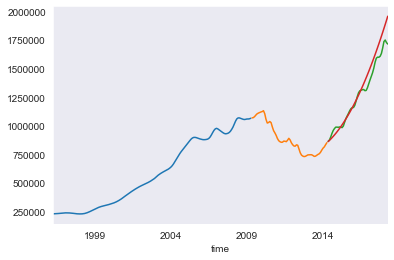

In [94]:
high_medians['11963'][:-108].plot()
high_medians['11963'][-108:-48].plot()
high_medians['11963'][-48:].plot()
preds_11963.plot()

In [99]:
predictions_dict = {k: SARIMAX_predictions(low_medians[k], v) for k,v in lmedian_sorted_cfgs.items()}
low_medians_predictions_df = pd.DataFrame(predictions_dict)
low_medians_predictions_df.to_pickle('../data/processed/low_medians_predictions_df.pkl')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros

In [154]:
# print(hmedian_roi_dict)
# print(lmedian_sorted)
# print(best_models)
print(best_models_high_medians)

[('94606', ([(2, 1, 0), (0, 0, 0, 0), 'ct'], 0.0301606701243062)), ('11963', ([(2, 0, 1), (0, 0, 0, 0), 'ct'], 0.09501346754203241))]


In [281]:
test_94606 = high_sarimax['94606']['test']
preds_94606 = high_sarimax['94606']['predictions']


In [101]:
low_medians_predictions_df.columns

Index(['34207', '33415', '33830', '49507', '33409', '48240', '30316', '48239'], dtype='object')

In [113]:
low_median_test = low_medians[-48:]
low_median_train = low_medians[-108:-47]
low_median_previous = low_medians[:-108]

low_median_test.to_pickle('../data/processed/low_median_test_df.pkl')
low_median_train.to_pickle('../data/processed/low_median_train_df.pkl')
low_median_previous.to_pickle('../data/processed/low_median_previous_df.pkl')

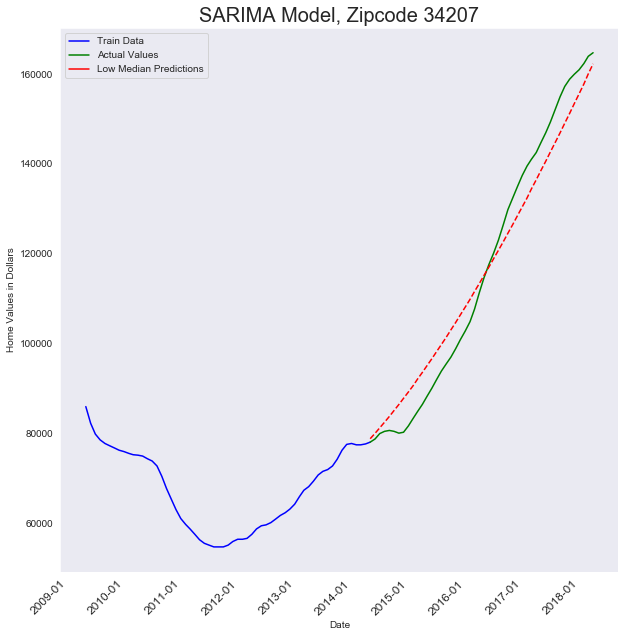

In [126]:
import matplotlib.dates as mdates

# fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

# sns.lineplot(data=low_median_previous['34207'], color='grey', label='Low Median Train Data', ax=ax)
sns.lineplot(data=low_median_train['34207'], label='Train Data', color='blue', ax=ax)
sns.lineplot(data=low_median_test['34207'], label='Actual Values', color='green', ax=ax)
sns.lineplot(data=low_medians_predictions_df['34207'], label='Low Median Predictions', color='red', style='--', ax=ax)
ax.set_title('SARIMA Model, Zipcode 34207', fontsize=20)
ax.set_ylabel('Home Values in Dollars')
ax.set_xlabel('Date')
ax.set_xticklabels(low_median_test.index, horizontalalignment='right', fontsize=12, rotation=45)
# ax.set_yticklabels(ax.get_yticklabels(which='both'), fontsize=12)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.lines[2].set_linestyle('--')
# ax.format_ydata = lambda x: '$%1.2f' % x

# sns.lineplot(data=test_94606, label='94606 Actual', ax=ax1)
# sns.lineplot(data=preds_94606, label='94606 Predictions', ax=ax1)

# ax1.set_title('ARIMA Model, Zipcode 94606')
# ax1.set_ylabel('Home Values in Dollars')
# ax1.set_xlabel('Date')
# ax1.set_xticklabels(test_94606.index, horizontalalignment='right', rotation=45)

# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months)

# ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax1.format_ydata = lambda x: '$%1.2f' % x

# fig.tight_layout()
# fig.savefig('../figures/model_comparison.png')

In [150]:
def plot_preds(zipcode, high_low='low', ax=None):
    
    import matplotlib.dates as mdates
    sns.set(font_scale = 2)
    
    if high_low == 'low':
        df_train = low_median_train
        df_test = low_median_test
        df_preds = low_medians_predictions_df
    elif high_low == 'high':
        df_train = high_median_train
        df_test = high_median_test
        df_preds = high_medians_predictions_df

    # fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,10))
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y-%m')

    # sns.lineplot(data=low_median_previous['34207'], color='grey', label='Low Median Train Data', ax=ax)
    sns.lineplot(data=df_train[zipcode], label='Train Data', color='blue', ax=ax)
    sns.lineplot(data=df_test[zipcode], label='Actual Values', color='green', ax=ax)
    sns.lineplot(data=df_preds[zipcode], label='Predictions', color='red', ax=ax)
    ax.set_title(f'SARIMA Model, Zipcode {zipcode}', fontsize=20)
    ax.set_ylabel('Home Values in Dollars')
    ax.set_xlabel('Date')
    ax.set_xticklabels(low_median_test.index, horizontalalignment='right', rotation=45)
    # ax.set_yticklabels(ax.get_yticklabels(which='both'), fontsize=12)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)

    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.lines[2].set_linestyle('--')
    
    fig.tight_layout()
    fig.savefig(f'../figures/sarima_{zipcode}.png')

In [142]:
hmedian_roi_dict

{'94606': 0.9174595810596209, '11963': 1.2970590104148543}

In [144]:
h_median_cfgs = {k: best_models_high_medians_dict[k][0] for k in best_models_high_medians_dict.keys()}
h_median_cfgs

{'94606': [(2, 1, 0), (0, 0, 0, 0), 'ct'],
 '11963': [(2, 0, 1), (0, 0, 0, 0), 'ct']}

In [146]:
high_predictions_dict = {k: SARIMAX_predictions(high_medians[k], v) for k,v in h_median_cfgs.items()}
high_medians_predictions_df = pd.DataFrame(high_predictions_dict)
high_medians_predictions_df.to_pickle('../data/processed/high_medians_predictions_df.pkl')
high_medians_predictions_df

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


,94606,11963
2014-05-01,361780.796383,8.618615e+05
2014-06-01,366637.588570,8.724376e+05
2014-07-01,371536.721549,8.835738e+05
2014-08-01,376526.565298,8.952637e+05
2014-09-01,381606.741938,9.075074e+05
2014-10-01,386776.166988,9.203047e+05
2014-11-01,392034.874520,9.336557e+05
2014-12-01,397382.888245,9.475605e+05
2015-01-01,402820.206836,9.620189e+05
2015-02-01,408346.829786,9.770310e+05


In [148]:
high_median_test = high_medians[-48:]
high_median_train = high_medians[-108:-47]





In [152]:
high_median_test

,94606,11963
time,,
2014-05-01,360000.0,864500.0
2014-06-01,364000.0,875400.0
2014-07-01,368200.0,901400.0
2014-08-01,368700.0,933100.0
2014-09-01,368600.0,959000.0
2014-10-01,371900.0,976000.0
2014-11-01,376100.0,988300.0
2014-12-01,378300.0,988400.0
2015-01-01,382800.0,986900.0


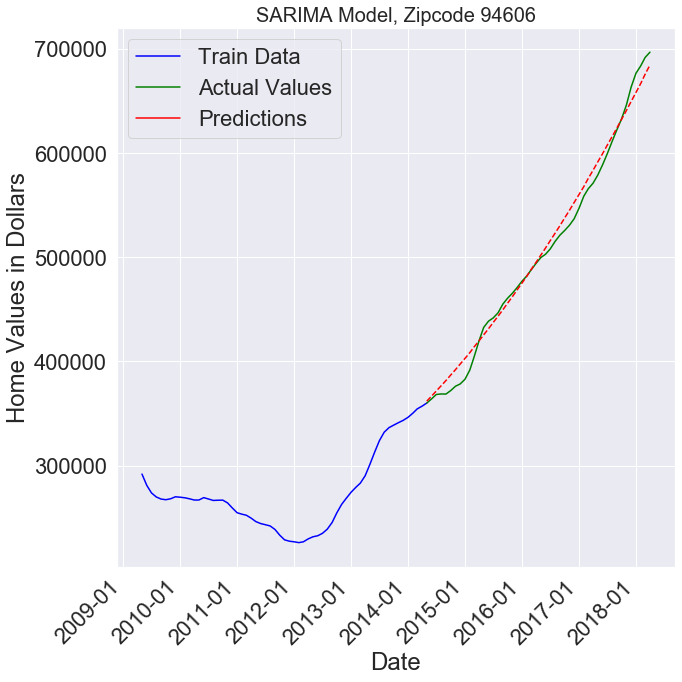

In [153]:
plot_preds('94606', high_low='high')

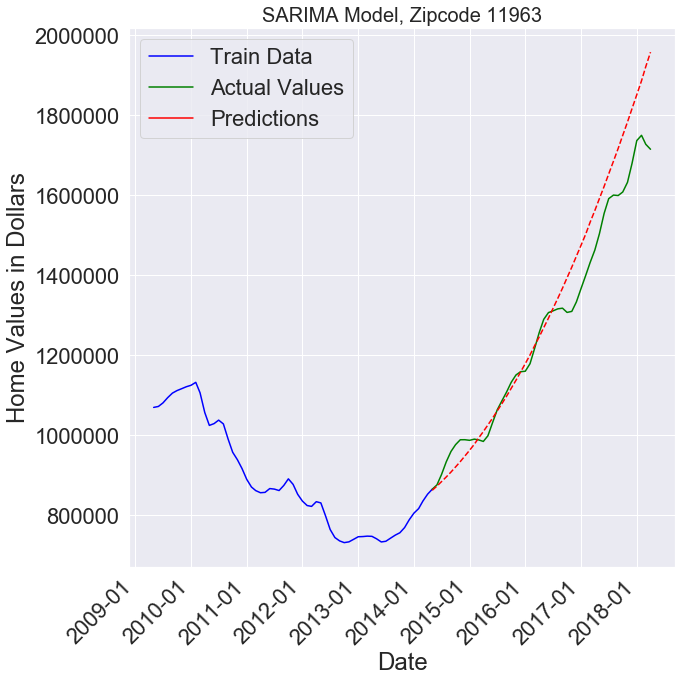

In [155]:
plot_preds('11963', high_low='high')

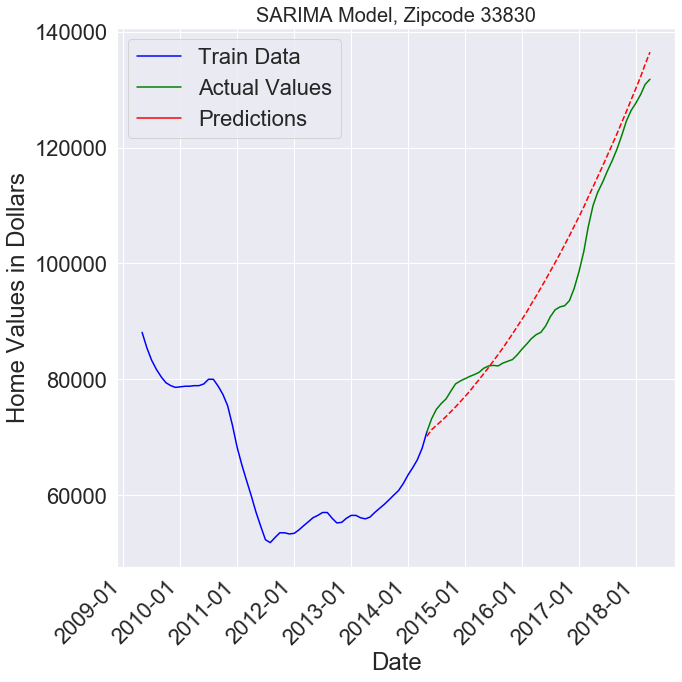

In [140]:
plot_preds('33830')

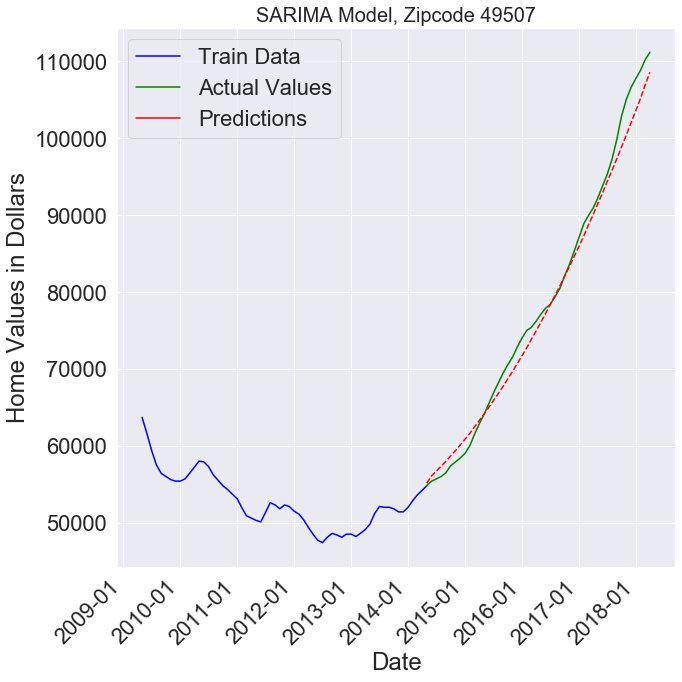

In [141]:
plot_preds('49507')

In [132]:
lmedian_sorted_error

{'34207': [1.0878498404635966, 0.06435950580487994],
 '33415': [1.0840771815135395, 0.07660754984216842],
 '33830': [1.0040166898310032, 0.08069576425546653],
 '49507': [1.003441714144584, 0.03373389268645687],
 '33409': [0.8744137102143154, 0.034227145034570534],
 '48240': [0.8445206764961235, 0.06105429071571234],
 '30316': [0.7922934412058605, 0.047568141577886476],
 '48239': [0.7054356269332223, 0.05129206183279851]}

In [ ]:
series = high_medians['94606']

X = series[-108:]

# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]


model = ExponentialSmoothing(train, trend='mul', seasonal='mul', freq='MS')

results = model.fit()

# Predict 48 months from end of train set
forecast_hw = results.predict(start=test.index[0], end=test.index[-1])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=test, label='94606 Actual')
sns.lineplot(data=forecast, label='94606 Predictions')
ax.set_title('Holt-Winters Model, Zipcode 94606')
ax.set_ylabel('Home Values in Dollars')
ax.set_xlabel('Date')

In [ ]:
def hw_rmse(series):
    """Simple wrapper that fits holtwinters model and returns RMSE for the predictions
    
    Params: (series) a timeseries to model
    
    Returns: rmse (float) the raw RMSE, rmse_pct (float) the RMSE represented as a percentage of total change in value"""
    

    X = series[-108:]

    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]


    model = ExponentialSmoothing(train, trend='add', seasonal='add', freq='MS')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.predict(start=test.index[0], end=test.index[-1])
    
    rmse = RMSE(test, forecast)
    rmse_pct = error_as_pct(rmse, train[-1], test[-1])
    return (rmse, rmse_pct)

In [ ]:
high_sarimax['94606']

In [ ]:
predictions

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


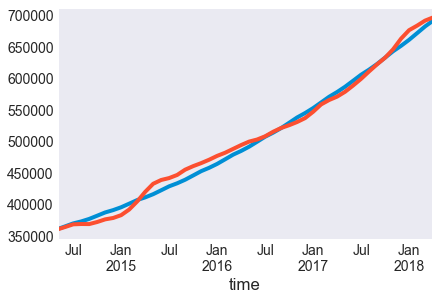

In [283]:
X = high_medians['94606']

# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]

model = SARIMAX(train, freq='MS', order=(0,2,1), seasonal_order=(1,1,0,2), initialization='approximate_diffuse')

results = model.fit()

# Predict 48 months from end of train set
forecast = results.get_forecast(steps=48)
pred_ci = forecast.conf_int(alpha=.05)

predictions = forecast.predicted_mean

rmse = RMSE(test, predictions)
pct = error_as_pct(rmse, train[-1], test[-1])

predictions.plot()
test.plot()

In [286]:
pred_ci

,lower 94606,upper 94606
2014-05-01,2.686101e+05,4.522891e+05
2014-06-01,1.695369e+05,5.604609e+05
2014-07-01,4.973834e+04,6.895583e+05
2014-08-01,-8.966642e+04,8.352623e+05
2014-09-01,-3.090743e+05,1.062668e+06
2014-10-01,-5.754563e+05,1.339248e+06
2014-11-01,-8.795200e+05,1.653709e+06
2014-12-01,-1.217279e+06,1.998867e+06
2015-01-01,-1.637738e+06,2.428423e+06
2015-02-01,-2.117326e+06,2.919307e+06


In [285]:
error_as_pct(rmse,train[-1], test[-1])

0.027066191482245053

In [ ]:
## Plot model evaluation and performance
## save to file


import matplotlib.dates as mdates
import matplotlib.ticker as ticker




formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,10))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

sns.lineplot(data=test, label='94606 Actual', ax=ax)
sns.lineplot(data=forecast_hw, label='94606 Predictions', ax=ax)
ax.set_title('Holt-Winters Model, Zipcode 94606')
ax.set_ylabel('Home Values in Dollars')
ax.set_xlabel('Date')
ax.set_xticklabels(test.index, horizontalalignment='right', rotation=45)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_ydata = lambda x: '$%1.2f' % x

sns.lineplot(data=test_94606, label='94606 Actual', ax=ax1)
sns.lineplot(data=predictions, label='94606 Predictions', ax=ax1)

ax1.set_title('SARIMA Model, Zipcode 94606')
ax1.set_ylabel('Home Values in Dollars')
ax1.set_xlabel('Date')
ax1.set_xticklabels(test_94606.index, horizontalalignment='right', rotation=45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax1.format_ydata = lambda x: '$%1.2f' % x

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig('../figures/model_comparison.png')